In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Arial"

import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Arial"
mpl.rcParams["mathtext.it"] = "Arial:italic"
mpl.rcParams["mathtext.bf"] = "Arial:bold"


dataset = ["cv", "cve", "cv24p", "cve24p"]

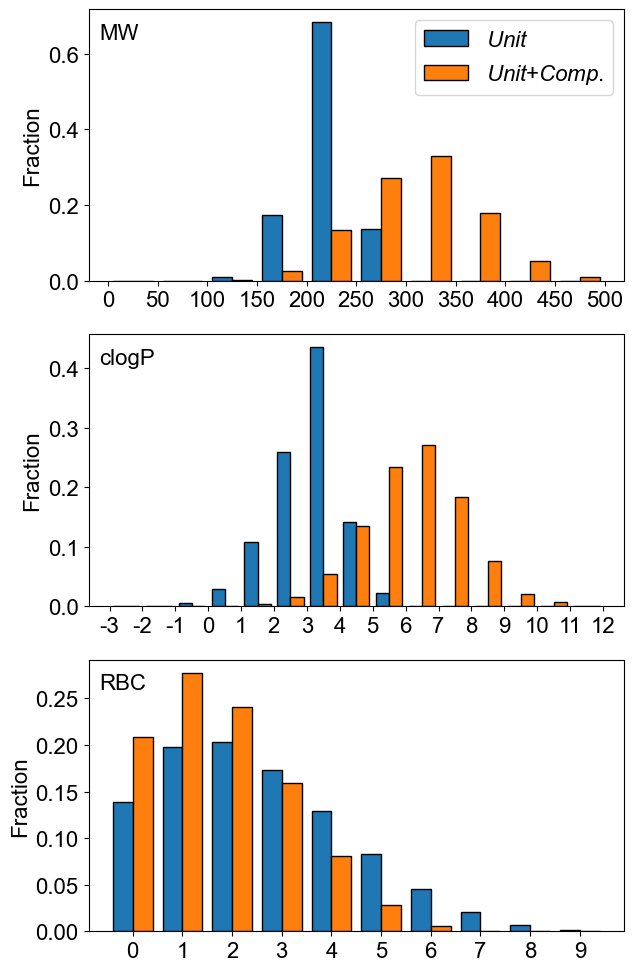

In [ ]:
# for operations in dataset:
df_unit = pd.read_csv(f'./cve_analysis.csv')
# df_unit = df_unit[df_unit["generation"] <= 9]
df_comp = pd.read_csv(f'./cve24p_analysis.csv')
# df_comp = df_comp[df_comp["generation"] <= 6]
# data = data["Generation"]
# data = data.value_counts().sort_index()
# data = data.reset_index()
# data.columns = ["distance", "count"]

fig, axes = plt.subplots(3, 1, figsize=(6.5, 10))

def side_by_side_hist(ax, x_u, x_c, bin_edges, xticks, panel_label, xlabel=None):
    # 生のカウント
    cnt_u, edges = np.histogram(x_u, bins=bin_edges)
    cnt_c, _     = np.histogram(x_c, bins=bin_edges)

    cnt_u = cnt_u / cnt_u.sum()
    cnt_c = cnt_c / cnt_c.sum()

    centers = 0.5 * (edges[:-1] + edges[1:])
    bw = edges[1] - edges[0]
    w  = bw * 0.4

    ax.bar(centers - w/2, cnt_u, width=w,
           edgecolor="black", color="C0", label=r"$\mathit{Unit}$")
    ax.bar(centers + w/2, cnt_c, width=w,
           edgecolor="black", color="C1", label=r"$\mathit{Unit}$+$\mathit{Comp.}$")

    ax.set_xticks(xticks)
    ax.set_xticklabels([int(t) if float(t).is_integer() else t for t in xticks])

    if xlabel is not None:
        ax.set_xlabel(xlabel)

    ax.set_ylabel("Fraction")
    ax.ticklabel_format(style="plain", axis="y", useOffset=False)
    if panel_label == "MW":
        ax.legend()
    ax.ticklabel_format(style="plain", axis="y", useOffset=False)

    ax.text(0.02, 0.95, panel_label,
            transform=ax.transAxes,
            ha="left", va="top")

x_u = df_unit["MW"].to_numpy()
x_c = df_comp["MW"].to_numpy()

bin_edges_MW = np.arange(0, 500 + 50, 50)   # [0, 50, 100, …, 500]
xticks_MW    = np.arange(0, 500 + 1, 50) 
side_by_side_hist(axes[0], x_u, x_c, bin_edges_MW, xticks_MW, panel_label="MW")

x_u = df_unit["clogP"].to_numpy()
x_c = df_comp["clogP"].to_numpy()
all_x = np.concatenate([x_u, x_c])

xmin = np.floor(all_x.min())
xmax = np.ceil(all_x.max())
bin_edges_clogP = np.arange(xmin, xmax + 1, 1.0) 
xticks_clogP    = bin_edges_clogP 
side_by_side_hist(axes[1], x_u, x_c,
                  bin_edges_clogP, xticks_clogP,
                  panel_label="clogP")

x_u = df_unit["RBC"].to_numpy()
x_c = df_comp["RBC"].to_numpy()
all_x = np.concatenate([x_u, x_c])

rbc_max = int(np.ceil(all_x.max()))

bin_edges_RBC = np.arange(-0.5, rbc_max + 0.5 + 1e-9, 1.0)
xticks_RBC    = np.arange(0, rbc_max + 1, 1)

side_by_side_hist(
    axes[2],
    x_u, x_c,
    bin_edges_RBC, xticks_RBC,
    panel_label="RBC"
)

fig.tight_layout()
plt.show()

In [53]:
yes = len(df_unit[df_unit["has_benzene"] & (df_unit["generation"] == 10)])
no = len(df_unit[(~df_unit["has_benzene"]) & (df_unit["generation"] == 10)])
print(yes,no, yes+no, yes/(yes+no))

yes = len(df_comp[df_comp["has_benzene"] & (df_comp["generation"] == 7)])
no = len(df_comp[(~df_comp["has_benzene"]) & (df_comp["generation"] == 7)])
print(yes,no, yes+no, yes/(yes+no))

101432 1955526 2056958 0.04931165342218947
7488765 13901 7502666 0.9981471919448367


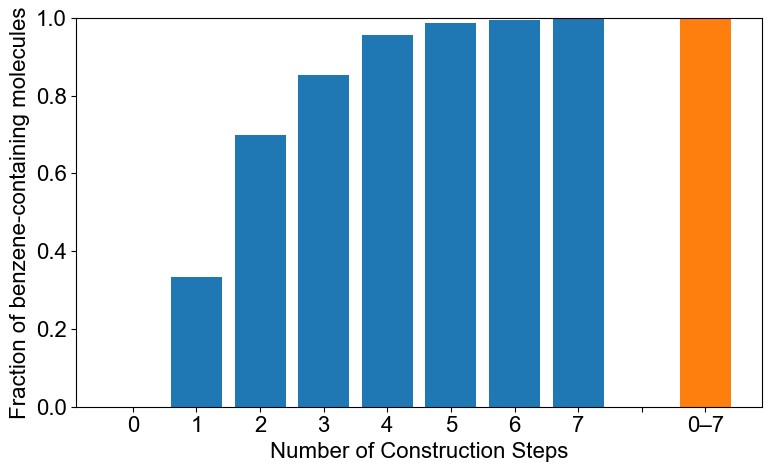

[0.         0.33333333 0.7        0.85263158 0.95731707 0.98648431
 0.99596956 0.99814719]


In [5]:
# for operations in dataset:
df = pd.read_csv(f'./cve24p_analysis.csv')


ratio = df.groupby("generation")["has_benzene"].mean()
overall = df["has_benzene"].mean()

gens = ratio.index.to_list()

x_gen = list(range(len(gens)))    
gap_pos = len(gens)                 
all_pos = gap_pos + 1               

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x_gen, ratio.values, label="per generation")

ax.bar(all_pos, overall, label="overall")

ax.set_xticks(x_gen + [gap_pos, all_pos])
ax.set_xticklabels([str(g) for g in gens] + ["", "0–7"])

ax.set_xlabel("Number of Construction Steps")
ax.set_ylabel("Fraction of benzene-containing molecules")
ax.set_ylim(0, 1)  

plt.tight_layout()
plt.show()
print(ratio.values)

num_connect       0       1       2       3      4    5
generation                                             
0                 1       0       0       0      0    0
1                 2       0       0       0      0    0
2                 3       0       0       0      0    0
3                 9       5       0       0      0    0
4                27      20       1       0      0    0
5               111     106      20       1      0    0
6               475     570     152       7      0    0
7              2292    3409    1300     117      2    0
8             11530   20766   10578    1510     32    0
9             60873  130284   85623   18400    845    5
10           330622  827605  678025  203734  16792  180


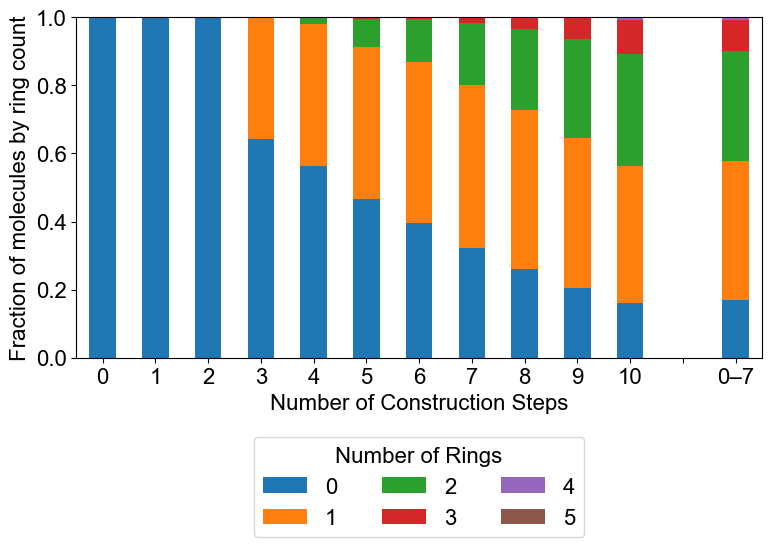

In [ ]:
# for operations in dataset:
# df = pd.read_csv(f'./cve_analysis.csv')
df = pd.read_csv(f'./cve24p_analysis.csv')

cnt = (
    df.groupby(["generation", "num_connect"])
      .size()
      .unstack(fill_value=0)
)

print(cnt)

prop = cnt.div(cnt.sum(axis=1), axis=0)

overall_cnt  = df.groupby("num_connect").size()
overall_prop = overall_cnt / overall_cnt.sum()

overall_prop = overall_prop.reindex(prop.columns, fill_value=0)

gens = sorted(prop.index.tolist())
prop2 = prop.reindex(gens)

prop2.loc[""]   = 0 
prop2.loc["0–7"] = overall_prop

prop2 = prop2.reindex(gens + ["", "0–7"])

fig, ax = plt.subplots(figsize=(8, 6))

prop2.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    rot=0,
)

ax.set_xlabel("Number of Construction Steps")
ax.set_ylabel("Fraction of molecules by ring count")
ax.set_ylim(0, 1)

ax.legend(title="Number of Rings", bbox_to_anchor=(0.5, -0.2),
          loc="upper center", ncol=len(prop2.columns)//2)

plt.tight_layout()
plt.show()

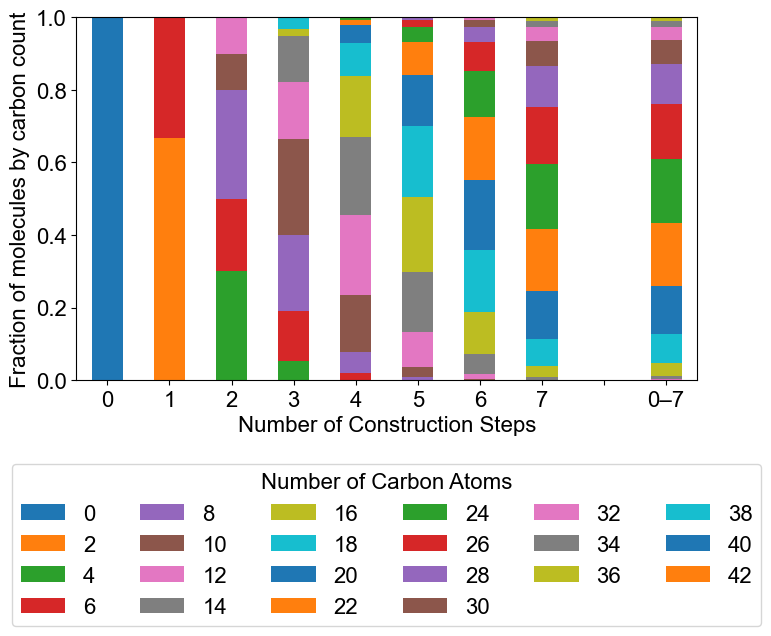

In [ ]:
# for operations in dataset:
# df = pd.read_csv(f'./cve_analysis.csv')
df = pd.read_csv(f'./cve24p_analysis.csv')
df["num_C"] = 2 * (df["num_vinyl"] + df["num_ethynyl"])

cnt = (
    df.groupby(["generation", "num_C"])
      .size()
      .unstack(fill_value=0)
)

prop = cnt.div(cnt.sum(axis=1), axis=0)

overall_cnt  = df.groupby("num_C").size()
overall_prop = overall_cnt / overall_cnt.sum()

overall_prop = overall_prop.reindex(prop.columns, fill_value=0)

gens = sorted(prop.index.tolist())
prop2 = prop.reindex(gens)

prop2.loc[""]   = 0 
prop2.loc["0–7"] = overall_prop

prop2 = prop2.reindex(gens + ["", "0–7"])

fig, ax = plt.subplots(figsize=(8, 7))

prop2.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    rot=0,       
)

ax.set_xlabel("Number of Construction Steps")
ax.set_ylabel("Fraction of molecules by carbon count")
ax.set_ylim(0, 1)

ax.legend(title="Number of Carbon Atoms", bbox_to_anchor=(0.5, -0.2),
          loc="upper center", ncol=6)

plt.tight_layout()
plt.show()

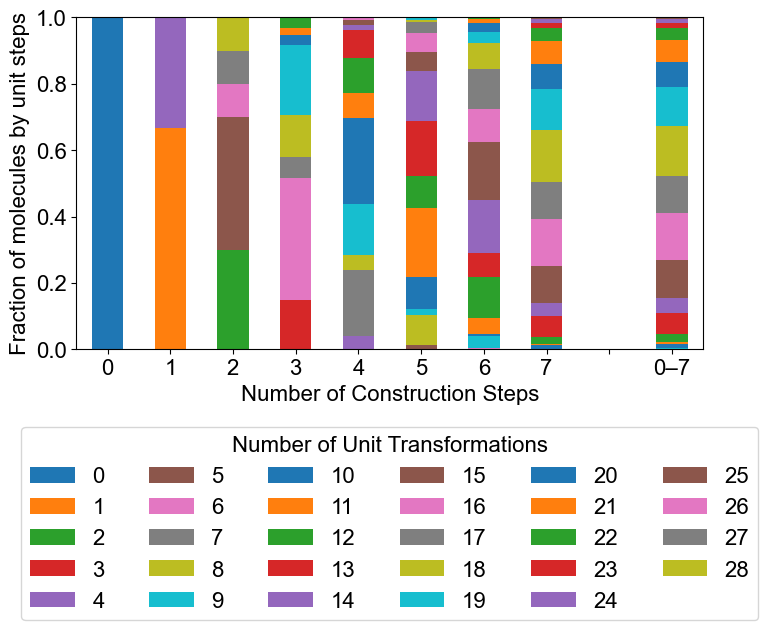

In [ ]:
# for operations in dataset:
# df = pd.read_csv(f'./cve_analysis.csv')
df = pd.read_csv(f'./cve24p_analysis.csv')
df["num_unit"] = df["num_connect"] + df["num_vinyl"] + df["num_ethynyl"]

cnt = (
    df.groupby(["generation", "num_unit"])
      .size()
      .unstack(fill_value=0)
)

prop = cnt.div(cnt.sum(axis=1), axis=0)

overall_cnt  = df.groupby("num_unit").size()
overall_prop = overall_cnt / overall_cnt.sum()

overall_prop = overall_prop.reindex(prop.columns, fill_value=0)

gens = sorted(prop.index.tolist())
prop2 = prop.reindex(gens)

prop2.loc[""]   = 0 
prop2.loc["0–7"] = overall_prop

prop2 = prop2.reindex(gens + ["", "0–7"])

fig, ax = plt.subplots(figsize=(8, 7))

prop2.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    rot=0, 
)

ax.set_xlabel("Number of Construction Steps")
ax.set_ylabel("Fraction of molecules by unit steps")
ax.set_ylim(0, 1)

ax.legend(title="Number of Unit Transformations", bbox_to_anchor=(0.5, -0.2),
          loc="upper center", ncol=6)

plt.tight_layout()
plt.show()

num_ethynyl        0        1       2       3      4     5   6  7
generation                                                       
0                  1        0       0       0      0     0   0  0
1                  2        1       0       0      0     0   0  0
2                  7        2       1       0      0     0   0  0
3                 61       25       8       1      0     0   0  0
4                691      350      94      12      1     0   0  0
5              10363     6234    1764     258     25     1   0  0
6             184329   124760   38428    6561    684    37   1  0
7            3668624  2715732  916304  178590  21757  1591  67  1


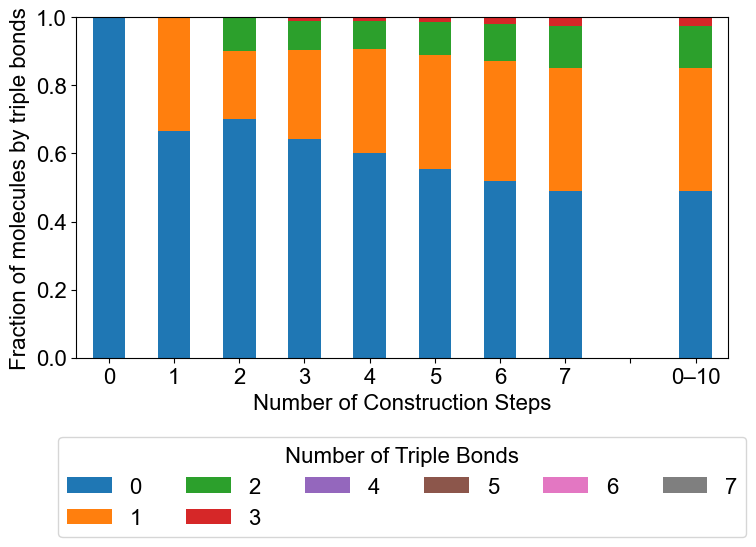

In [ ]:
# for operations in dataset:
# df = pd.read_csv(f'./cve_analysis.csv')
df = pd.read_csv(f'./cve24p_analysis.csv')

cnt = (
    df.groupby(["generation", "num_ethynyl"])
      .size()
      .unstack(fill_value=0)
)

print(cnt)

prop = cnt.div(cnt.sum(axis=1), axis=0)

overall_cnt  = df.groupby("num_ethynyl").size()
overall_prop = overall_cnt / overall_cnt.sum()

overall_prop = overall_prop.reindex(prop.columns, fill_value=0)

gens = sorted(prop.index.tolist())
prop2 = prop.reindex(gens)

prop2.loc[""]   = 0 
prop2.loc["0–10"] = overall_prop

prop2 = prop2.reindex(gens + ["", "0–10"])

fig, ax = plt.subplots(figsize=(8, 6))

prop2.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    rot=0,
)

ax.set_xlabel("Number of Construction Steps")
ax.set_ylabel("Fraction of molecules by triple bonds")
ax.set_ylim(0, 1)

ax.legend(title="Number of Triple Bonds", bbox_to_anchor=(0.5, -0.2),
          loc="upper center", ncol=6)

plt.tight_layout()
plt.show()